**Reasoning**:
Import the pandas library, construct the file path, load the CSV into a DataFrame, and display the head to verify the loading.



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

DATA_PATH = "../data/credit_risk_dataset.csv"

df = pd.read_csv(DATA_PATH)

**Reasoning**:
Display the head, info, and summary statistics of the DataFrame as requested in the subtask.



In [7]:
display(df.head())
display(df.info())
display(df.describe())
print("Shape:", df.shape)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
 11  loan_status                 32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


None

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.170203,5.804211,0.218164
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.106782,4.055001,0.413006
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


Shape: (32581, 12)


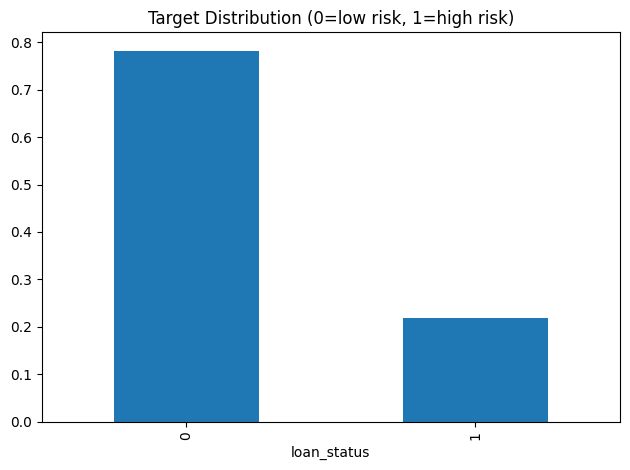

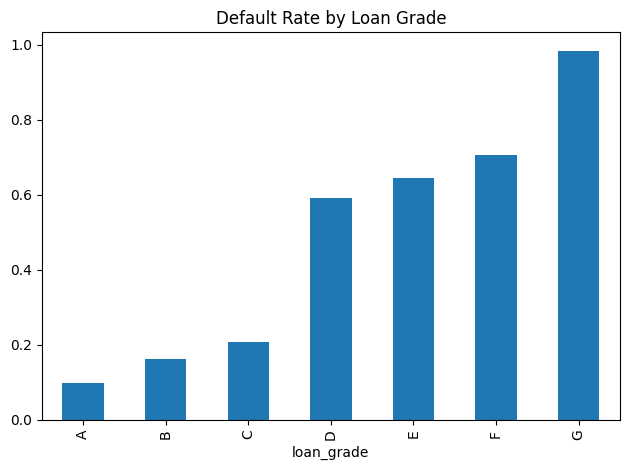

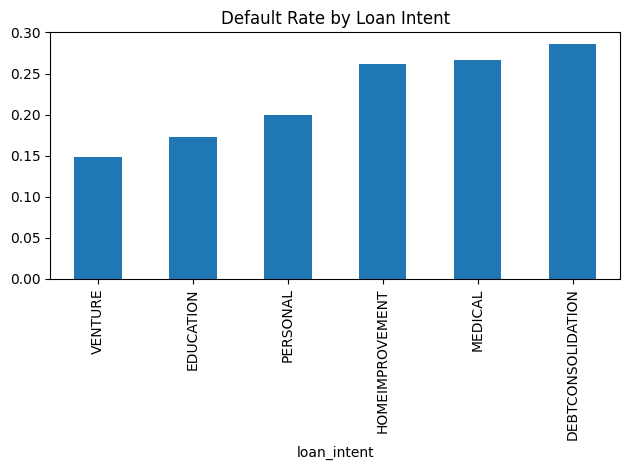

In [9]:
# Target distribution
df['loan_status'].value_counts(normalize=True).plot(kind='bar')
plt.title('Target Distribution (0=low risk, 1=high risk)')
plt.tight_layout()
plt.show()

# Default rate by loan_grade
grade_default = df.groupby('loan_grade')['loan_status'].mean().sort_values()
grade_default.plot(kind='bar')
plt.title('Default Rate by Loan Grade')
plt.tight_layout()
plt.show()

# Loan intent vs default
intent_default = df.groupby('loan_intent')['loan_status'].mean().sort_values()
intent_default.plot(kind='bar')
plt.title('Default Rate by Loan Intent')
plt.tight_layout()
plt.show()

## Missing values

### Subtask:
Check for missing values in the DataFrame and visualize them if necessary.


**Reasoning**:
Calculate and display the number of missing values for each column.



In [10]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64


**Reasoning**:
Visualize the missing values using a bar chart since there are missing values in `person_emp_length` and `loan_int_rate`.



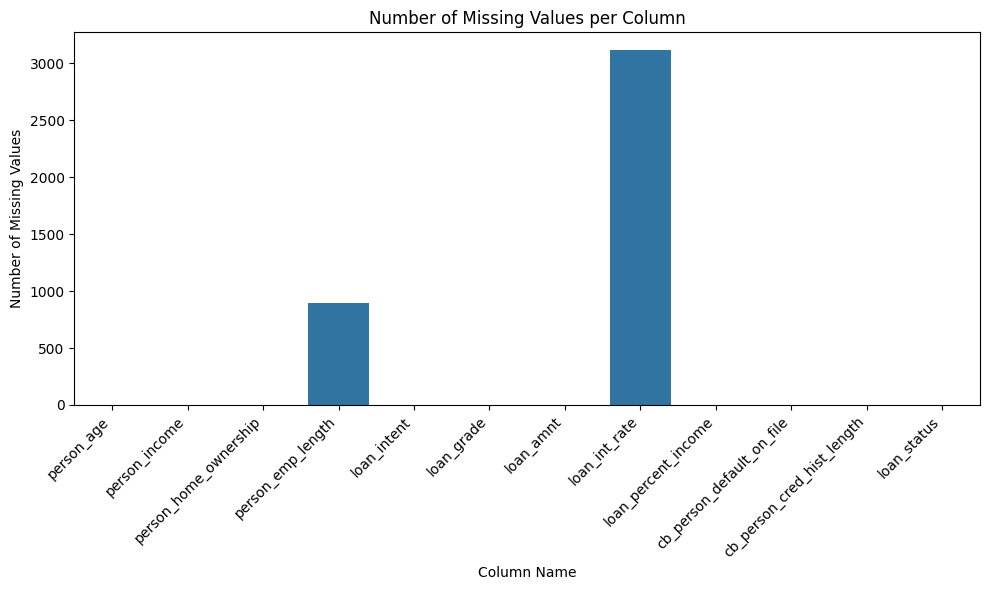

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Column Name')
plt.tight_layout()
plt.show()

## Correlation analysis

### Subtask:
Calculate and visualize the correlation matrix of the DataFrame.


**Reasoning**:
Calculate the correlation matrix and visualize it as a heatmap with annotations and a title.



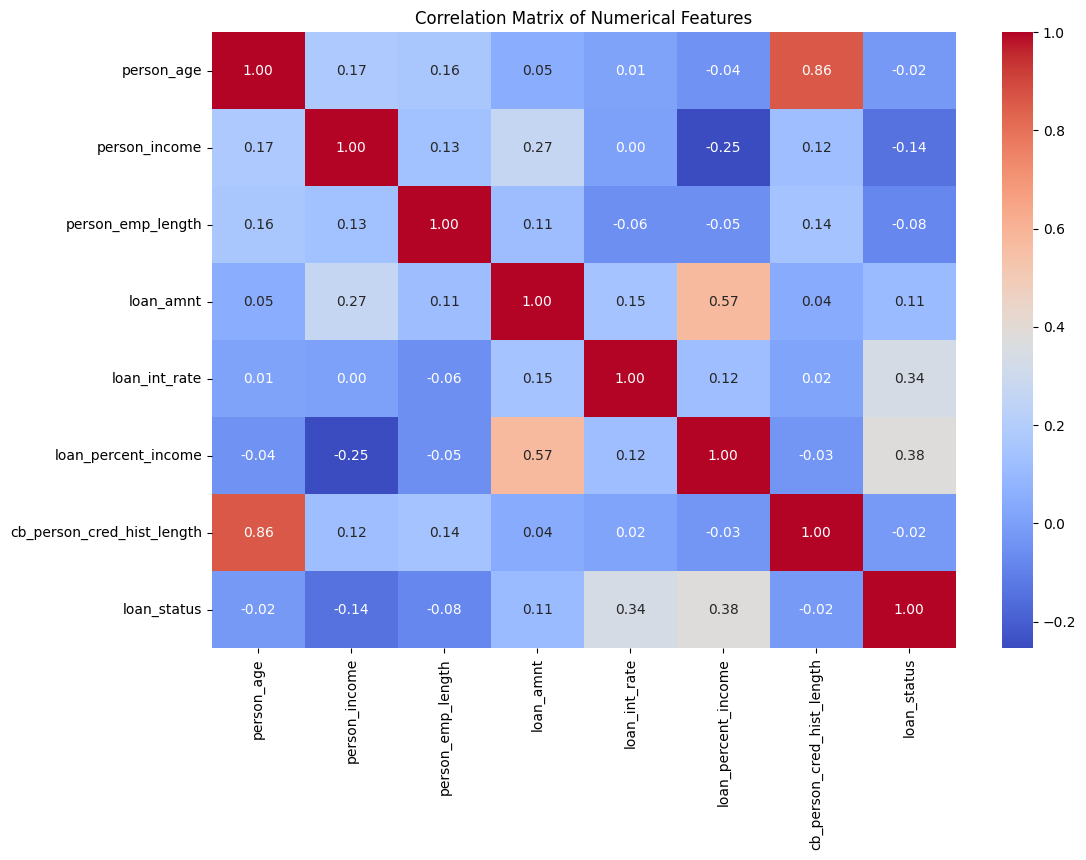

In [12]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 32581 entries and includes numerical (int64, float64) and object data types.
*   Two columns, `person_emp_length` and `loan_int_rate`, have missing values. `person_emp_length` has 895 missing values, while `loan_int_rate` has 3116 missing values.
*   The correlation matrix for numerical features was calculated and visualized.

### Insights or Next Steps

*   Address the missing values in the `person_emp_length` and `loan_int_rate` columns through imputation or removal, depending on the analysis goals and the extent of missingness.
*   Investigate the relationships highlighted in the correlation matrix further to understand potential dependencies between numerical features and their impact on loan outcomes.


## Strategize missing value handling

### Subtask:
Based on the nature and extent of missingness, decide on the most appropriate method to handle missing values (e.g., imputation with mean, median, mode, or dropping rows/columns).


**Reasoning**:
Evaluate the percentage of missing values for `person_emp_length` and `loan_int_rate` to determine the best strategy for handling them. Since both columns are numerical and the percentage of missing values is relatively small, imputation is a more suitable strategy than dropping rows or columns.



In [13]:
missing_percentage_emp_length = (df['person_emp_length'].isnull().sum() / len(df)) * 100
missing_percentage_int_rate = (df['loan_int_rate'].isnull().sum() / len(df)) * 100

print(f"Percentage of missing values in 'person_emp_length': {missing_percentage_emp_length:.2f}%")
print(f"Percentage of missing values in 'loan_int_rate': {missing_percentage_int_rate:.2f}%")

print("\nReasoning for handling missing values:")
print("For 'person_emp_length' and 'loan_int_rate', the percentage of missing values is relatively small (approximately 2.75% and 9.56% respectively). Since these are numerical columns and dropping rows would lead to a significant loss of data, imputation is the preferred method.")
print("The specific imputation strategy (mean, median, or mode) will be decided based on the distribution of the non-missing data in the next steps.")

Percentage of missing values in 'person_emp_length': 2.75%
Percentage of missing values in 'loan_int_rate': 9.56%

Reasoning for handling missing values:
For 'person_emp_length' and 'loan_int_rate', the percentage of missing values is relatively small (approximately 2.75% and 9.56% respectively). Since these are numerical columns and dropping rows would lead to a significant loss of data, imputation is the preferred method.
The specific imputation strategy (mean, median, or mode) will be decided based on the distribution of the non-missing data in the next steps.


## Implement missing value handling

### Subtask:
Apply the chosen method to handle the missing values in the DataFrame.


**Reasoning**:
Calculate the medians for the specified columns and impute the missing values with these medians.



In [14]:
median_emp_length = df['person_emp_length'].median()
df['person_emp_length'].fillna(median_emp_length, inplace=True)

median_int_rate = df['loan_int_rate'].median()
df['loan_int_rate'].fillna(median_int_rate, inplace=True)

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


C:\Users\patil\AppData\Local\Temp\ipykernel_12216\1488407753.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(median_emp_length, inplace=True)
C:\Users\patil\AppData\Local\Temp\ipykernel_12216\1488407753.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

## Summarize cleaning steps

### Subtask:
Provide a summary of the steps taken to clean the dataset.


## Summary:

### Data Analysis Key Findings

*   Initially, the dataset had missing values in two columns: `person_emp_length` (895 missing values) and `loan_int_rate` (3116 missing values).
*   The percentage of missing values in `person_emp_length` was approximately 2.75%, and in `loan_int_rate`, it was approximately 9.56%.
*   Due to the relatively small percentage of missing values and the numerical nature of the columns, imputation was chosen over dropping rows.
*   Missing values in both `person_emp_length` and `loan_int_rate` were imputed using the median of each respective column.
*   After the imputation process, a verification step confirmed that there were no remaining missing values in the dataset.

### Insights or Next Steps

*   The chosen imputation strategy (median) is suitable for handling outliers that might be present in the data distribution of `person_emp_length` and `loan_int_rate`.
*   Further analysis could explore the distributions of `person_emp_length` and `loan_int_rate` after imputation to understand the impact of the imputed values on the overall data characteristics.


**Reasoning**:
Display the data types, descriptive statistics for numerical columns, and value counts for categorical columns to understand the data distribution as requested in the subtask.



In [15]:
print("Data types:")
print(df.dtypes)

print("\nValue counts for categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())

Data types:
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

Value counts for categorical columns:

Value counts for 'person_home_ownership':
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

Value counts for 'loan_intent':
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

Value counts for 'loan_grade':
loan_grade
A    10777
B    10451
C     6458
D     3626
E 

**Reasoning**:
Create histograms and box plots for the specified numerical columns to visualize their distributions and identify outliers.



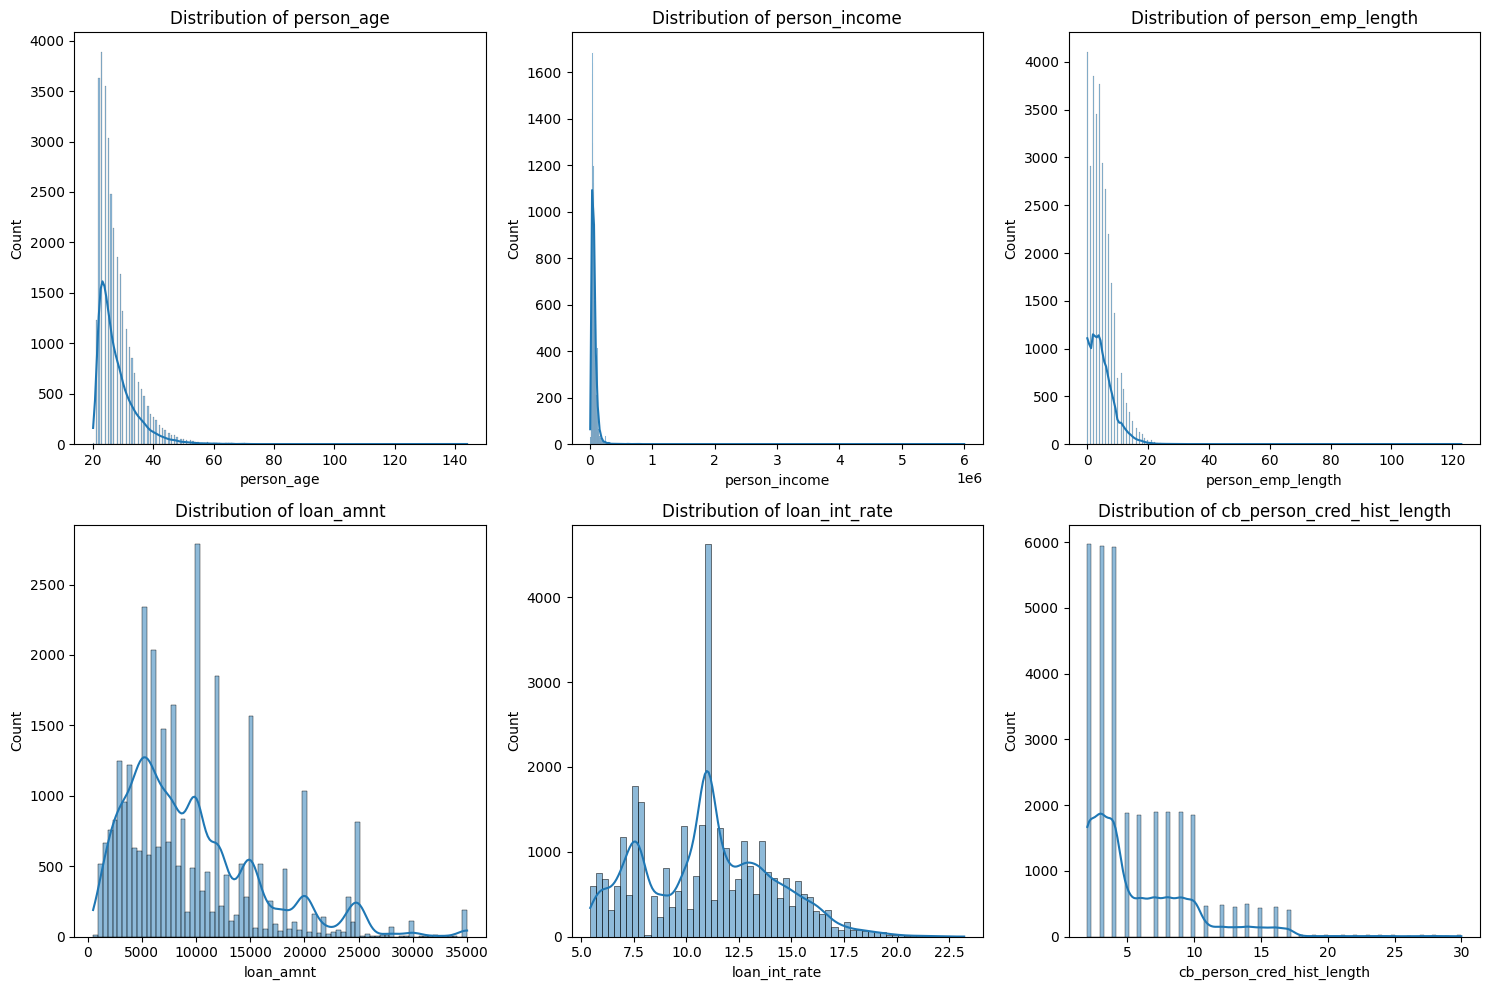

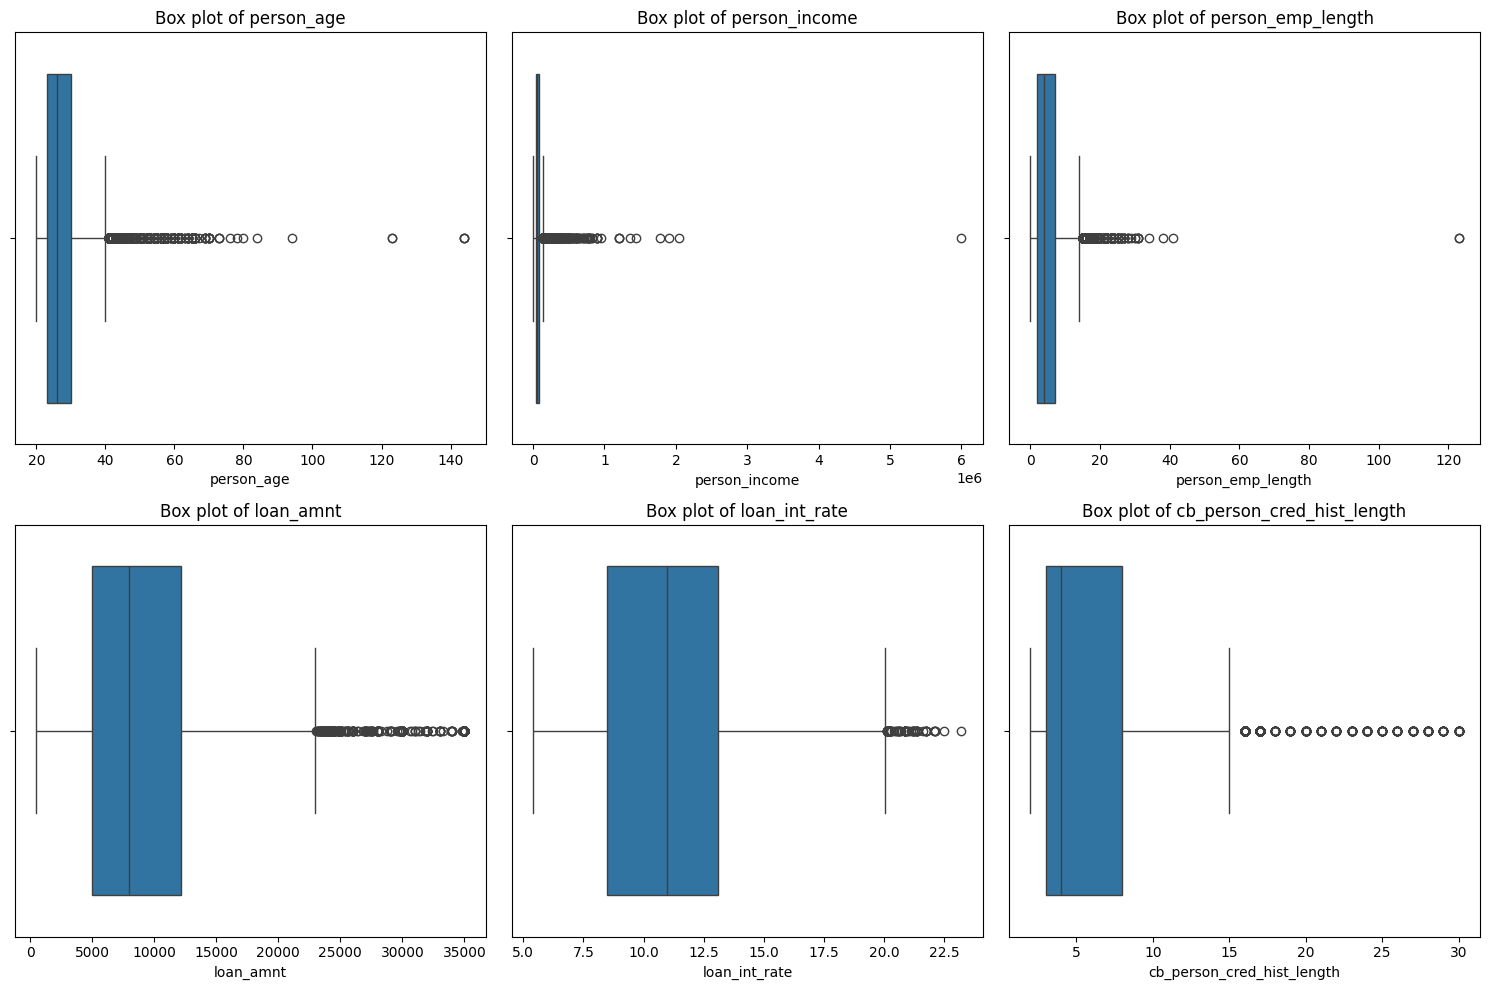

In [16]:
numerical_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']

# Create histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Create box plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

**Reasoning**:
Create count plots for the categorical columns to visualize their frequency distributions.



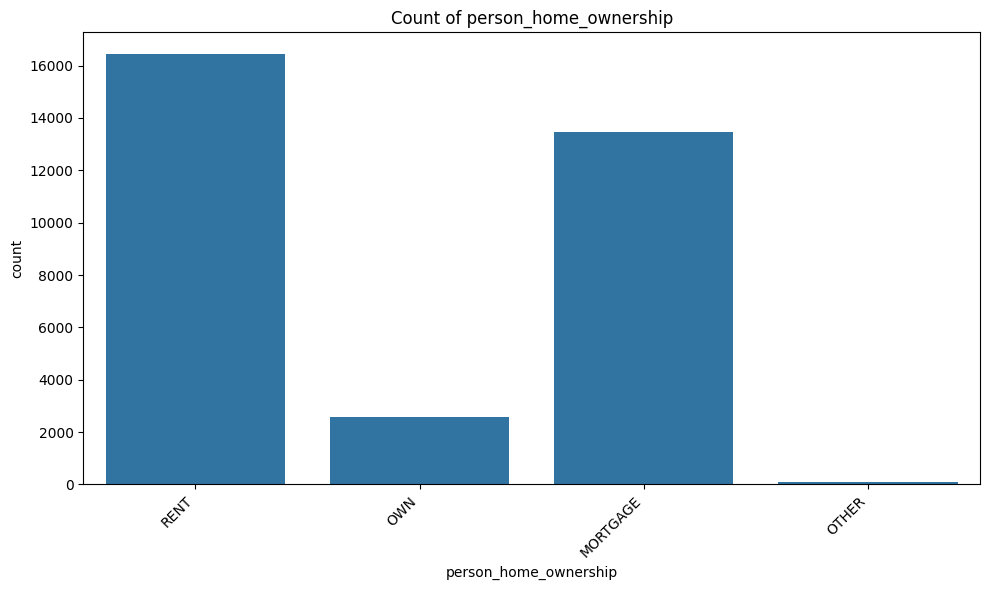

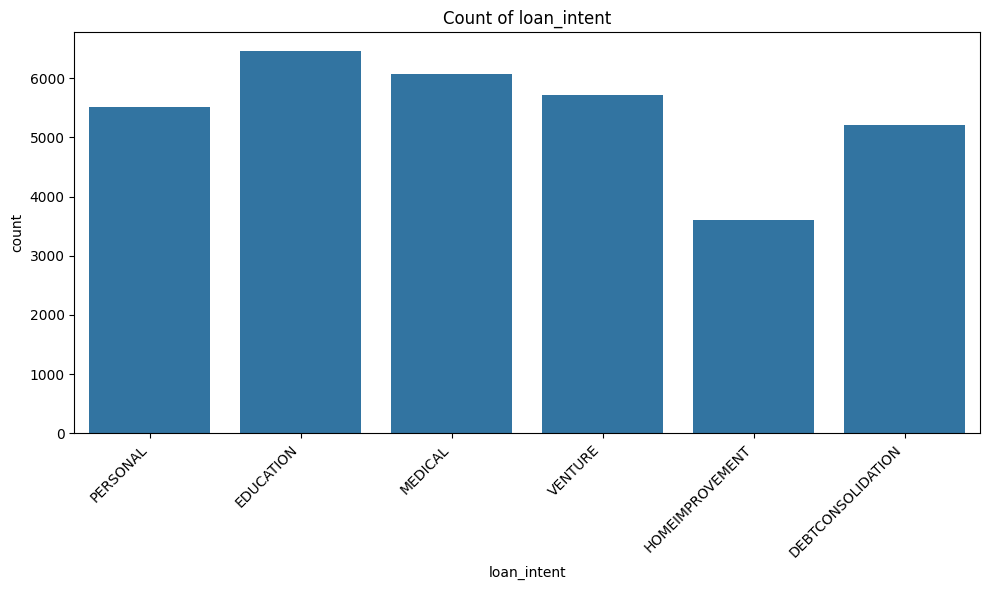

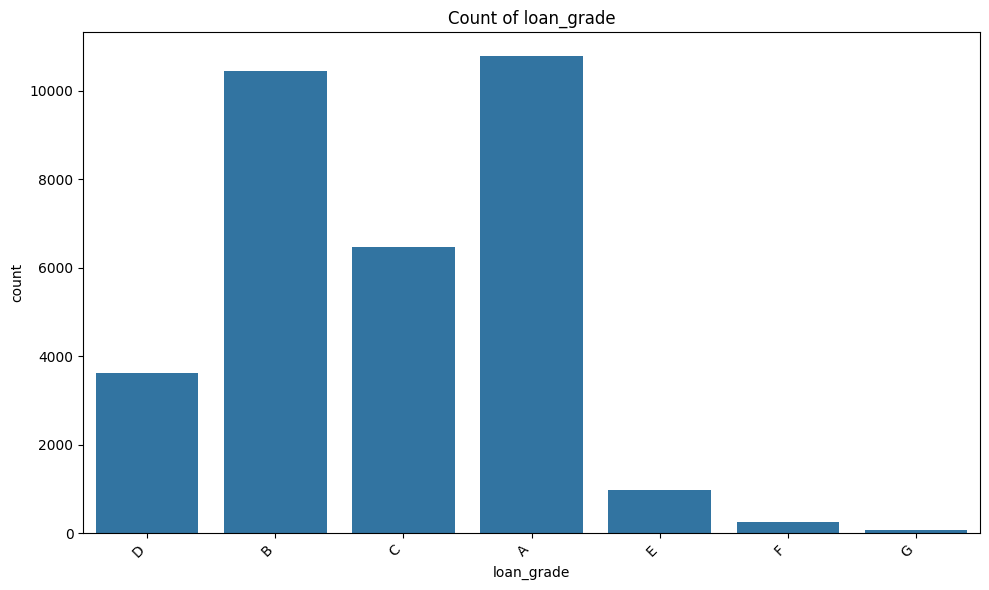

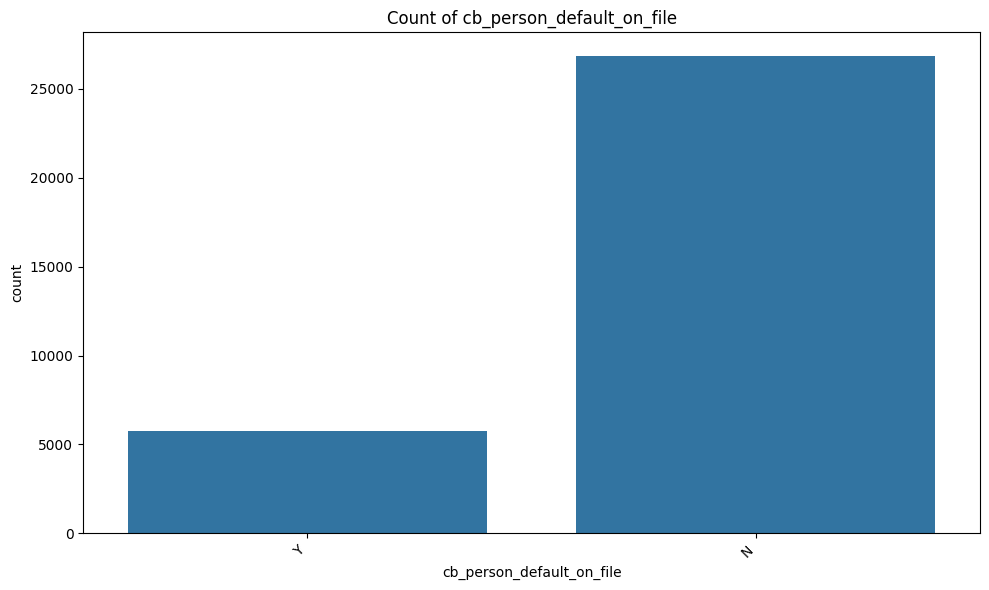

In [17]:
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Reasoning**:
Create the requested visualizations to explore the relationships between different features as specified in the subtask.



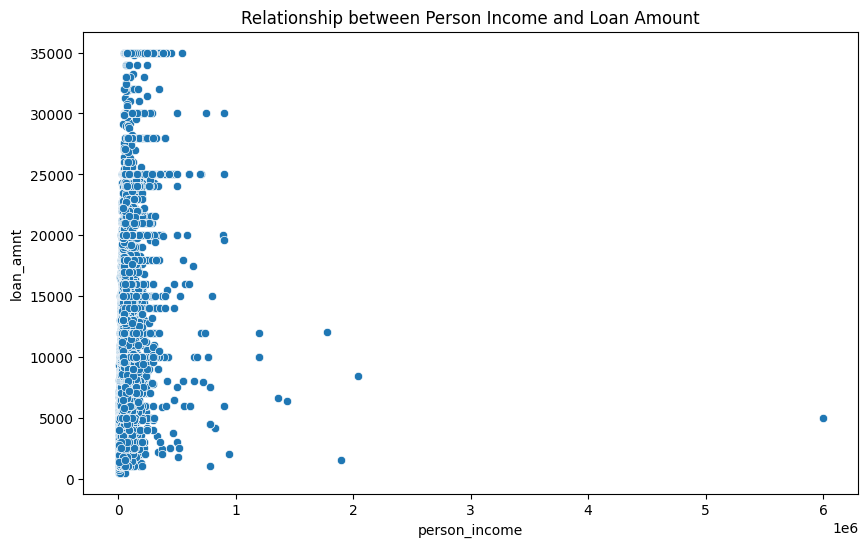

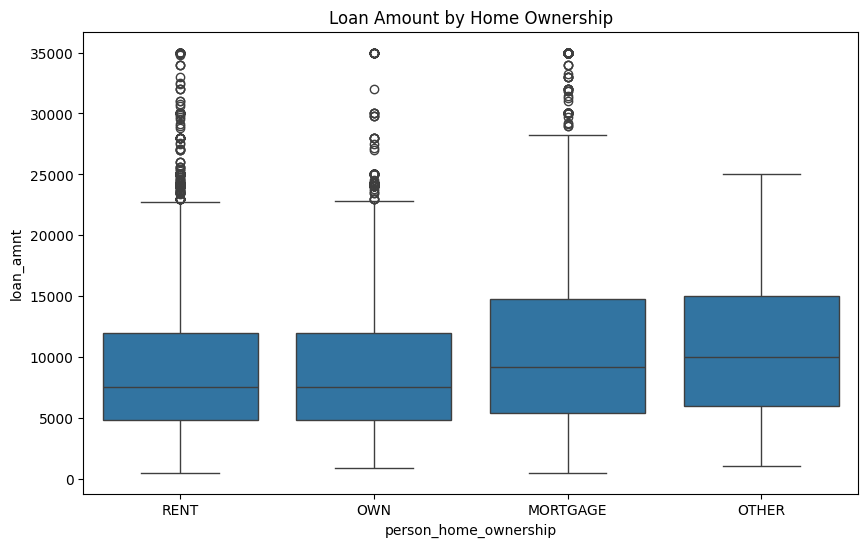

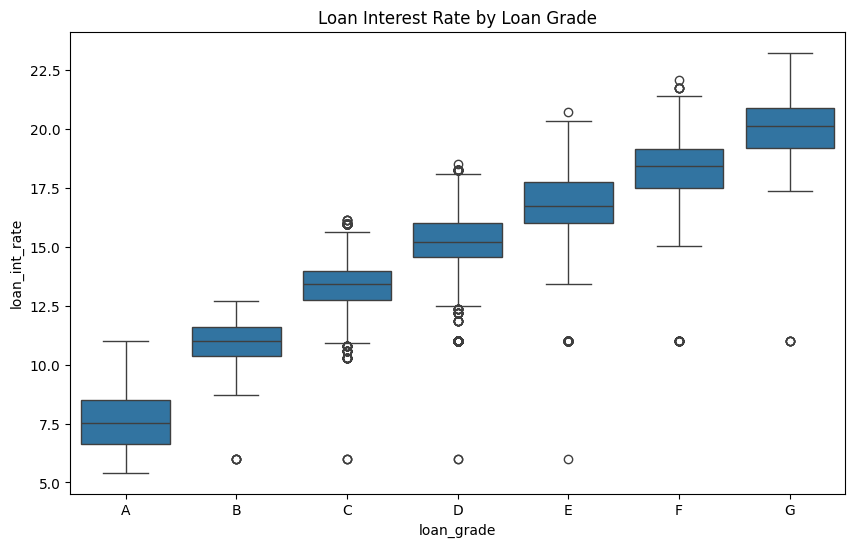

In [18]:
# Scatter plot of person_income vs. loan_amnt
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='person_income', y='loan_amnt')
plt.title('Relationship between Person Income and Loan Amount')
plt.show()

# Box plot of person_home_ownership vs. loan_amnt
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='person_home_ownership', y='loan_amnt')
plt.title('Loan Amount by Home Ownership')
plt.show()

# Box plot of loan_grade vs. loan_int_rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_grade', y='loan_int_rate', order=sorted(df['loan_grade'].unique()))
plt.title('Loan Interest Rate by Loan Grade')
plt.show()

**Reasoning**:
Provide explanations for the generated visualizations based on data types, distributions, and the article.



In [19]:
print("Explanation of Visualizations:")

print("\nHistograms for Numerical Features:")
print("Chosen because histograms are effective for visualizing the distribution of a single numerical variable, as discussed in the article.")
print("They show the shape of the distribution (e.g., normal, skewed), central tendency, and spread.")
print("For example, the histogram for 'person_income' shows a right-skewed distribution, indicating that most people have lower incomes, with a few having significantly higher incomes.")

print("\nBox Plots for Numerical Features:")
print("Chosen because box plots provide a summary of the distribution of a numerical variable, including the median, quartiles, and potential outliers.")
print("According to the article, box plots are useful for comparing distributions across different groups or for identifying the presence of outliers.")
print("The box plots for features like 'person_age' and 'loan_amnt' help in quickly identifying the range of values and the location of the median.")

print("\nCount Plots for Categorical Features:")
print("Chosen because count plots (or bar plots) are ideal for visualizing the frequency distribution of categorical variables.")
print("As mentioned in the article, they clearly show the number or proportion of observations in each category.")
print("The count plots for 'person_home_ownership' and 'loan_intent' illustrate the most common categories within these features.")

print("\nScatter Plot for Numerical Relationship (person_income vs. loan_amnt):")
print("Chosen because scatter plots are used to visualize the relationship between two numerical variables.")
print("The article highlights that scatter plots can reveal patterns, trends, or correlations between variables.")
print("The scatter plot of 'person_income' vs. 'loan_amnt' helps to visually assess if there is a linear or non-linear relationship between income and the amount borrowed.")

print("\nBox Plots for Categorical and Numerical Relationship (person_home_ownership vs. loan_amnt, loan_grade vs. loan_int_rate):")
print("Chosen because box plots are useful for examining how the distribution of a numerical variable varies across different categories of a categorical variable.")
print("This aligns with the article's point about using visualizations to understand relationships between different data types.")
print("The box plot of 'loan_grade' vs. 'loan_int_rate' clearly shows how the range and median of interest rates differ across different loan grades, indicating a strong relationship.")

Explanation of Visualizations:

Histograms for Numerical Features:
Chosen because histograms are effective for visualizing the distribution of a single numerical variable, as discussed in the article.
They show the shape of the distribution (e.g., normal, skewed), central tendency, and spread.
For example, the histogram for 'person_income' shows a right-skewed distribution, indicating that most people have lower incomes, with a few having significantly higher incomes.

Box Plots for Numerical Features:
Chosen because box plots provide a summary of the distribution of a numerical variable, including the median, quartiles, and potential outliers.
According to the article, box plots are useful for comparing distributions across different groups or for identifying the presence of outliers.
The box plots for features like 'person_age' and 'loan_amnt' help in quickly identifying the range of values and the location of the median.

Count Plots for Categorical Features:
Chosen because count pl

## Summary:

### Data Analysis Key Findings

*   Histograms for numerical features like `person_income` show a right-skewed distribution, indicating that most individuals have lower incomes with a few having significantly higher incomes.
*   Box plots revealed the distribution and potential outliers in numerical features such as `person_age` and `loan_amnt$.
*   Count plots for categorical features like `person_home_ownership` and `loan_intent` illustrate the frequency of different categories.
*   A scatter plot of `person_income` versus `loan_amnt` suggests a general trend where higher income is associated with larger loan amounts, though with considerable variability.
*   Box plots comparing `loan_grade` and `loan_int_rate` clearly demonstrate that lower loan grades (higher risk) are associated with higher and more variable interest rates.

### Insights or Next Steps

*   The presence of outliers and skewed distributions in several numerical features suggests that data transformation or robust statistical methods may be necessary for subsequent modeling.
*   The strong relationship observed between `loan_grade` and `loan_int_rate` indicates that `loan_grade` is a significant predictor of interest rate and should be carefully considered in predictive modeling.
